# Assignment 01

Let us consider a public database called the “Adult” dataset, hosted on UCI’s Machine Learning Repository.1 It
contains approximately 32,000 observations concerning different financial parameters related to the US
population: age, sex, marital (marital status of the individual), country, income (Boolean variable: whether the
person makes more than $50,000 per annum), education (the highest level of education achieved by the
individual), occupation, capital gain, etc. We will show that we can explore the data by asking questions like:
“Are men more likely to become high-income professionals than women, i.e., to receive an income of over
$50,000 per annum?”
Visit the UCI Machine Learning website and search for Adult Data Set
https://archive.ics.uci.edu/ml/datasets/Adult, spend a few moments to understand the dataset. Now, start
working with the given dataset as directed:
Hypothesis: - This data set is meant for binary class classification - to predict whether the income of a
person exceeds 50K per year based on some census data.
Part A (EDA) :
1. define column names.
2. See if there are any NaNs in the dataframe.
3. Print unique values for the Income column.
4. Convert the <=50Ks into 1 and the >50K into 0.
5. Extract the target variable income into a numpy array and drop it from the dataframe.
6. Let's get some summary statistics on these numerical columns hint dataframe.describe().
7. Find out the distinct count of each categorical column.
8. Now, what insights you can draw from this dataset?
9. Draw Heatmap and find the correlation between the features.
Part A (Models Implementation) :
1. Split the dataset into 60% for training and 40% for testing.
2. Train and fit your model on the given dataset.
3. Apply the following Models:
Support Vector Machines, Decision Tree, and Random Forest.
4. Apply evaluation matrics on the above models and write which model performs better and why.
Justify your answer.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Part A (EDA) :

In [3]:
# load the dataset

# * 1   define column names.¶
# age
# workclass
# fnlwgt
# education
# education-num
# marital-status
# occupation
# relationship
# race
# sex
# capital-gain
# capital-loss
# hours-per-week

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv(url, header=None, names=columns)
df.head(40)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
# 2.See if there are any NaNs in the dataframe.
df.isna().sum()
# OR
df.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [5]:
# 3.Print unique values for the Income column.
#it is for the count of unique value of "income" column.
df['income'].nunique()
#it is for unique value of income column.
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [6]:
# 4. Convert the <=50Ks into 1 and the >50K into 0.
df['income'].replace({' <=50K':1, ' >50K':0},inplace=True)


In [7]:
#5. Extract the target variable income into a numpy array and drop it from the dataframe.
y=df['income'].values
df.drop('income',axis=1,inplace=True)

In [8]:
# 6. Let's get some summary statistics on these numerical columns hint dataframe.describe().
df.describe(exclude='object')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
#7. Find out the distinct count of each categorical column.
categorical_column=df.select_dtypes(include='object').columns
for i in categorical_column:
    print(i,df[i].nunique())

workclass 9
education 16
marital-status 7
occupation 15
relationship 6
race 5
sex 2
native-country 42


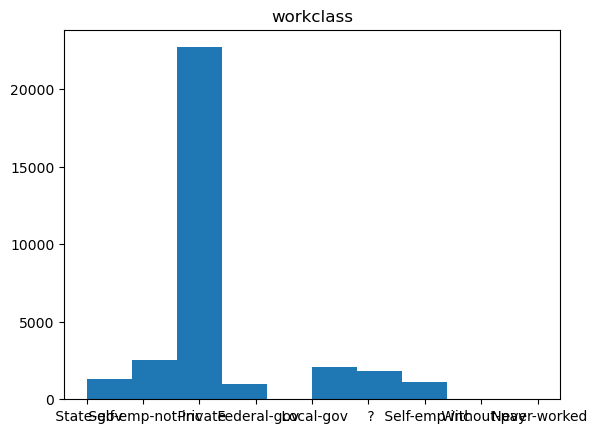

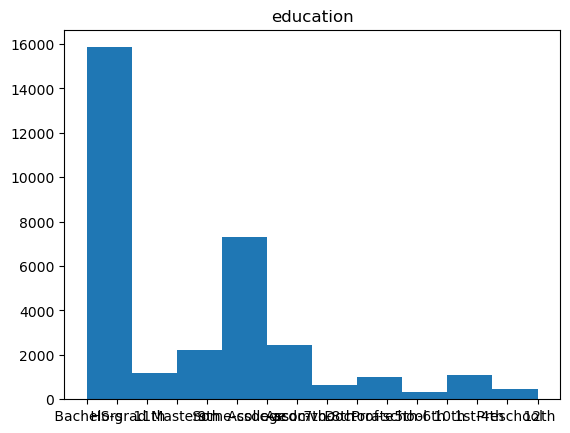

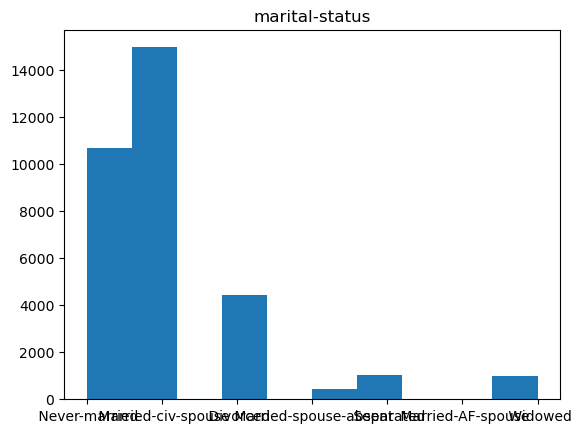

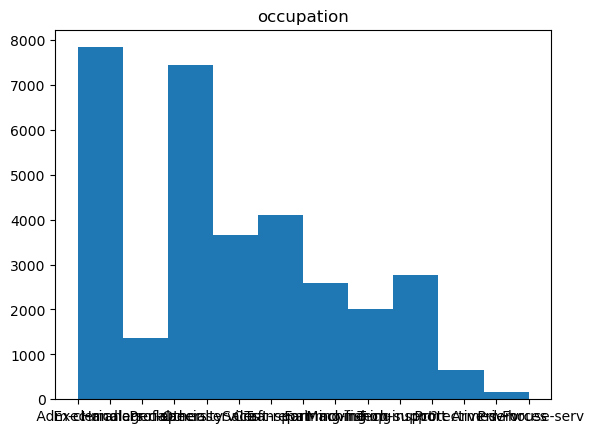

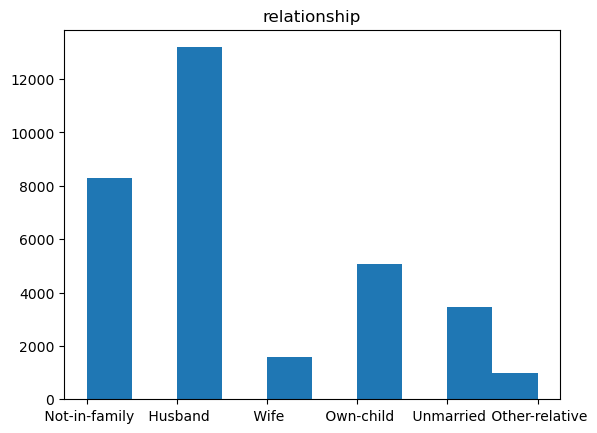

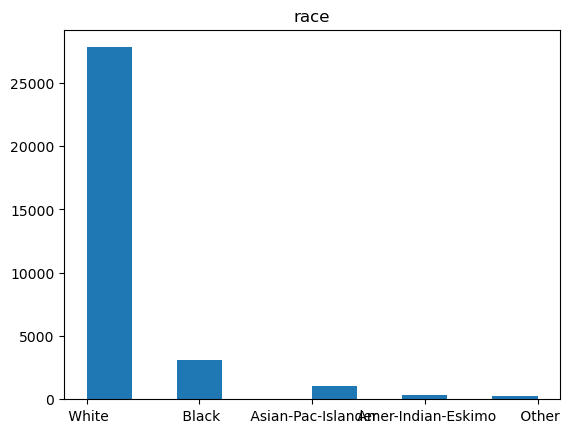

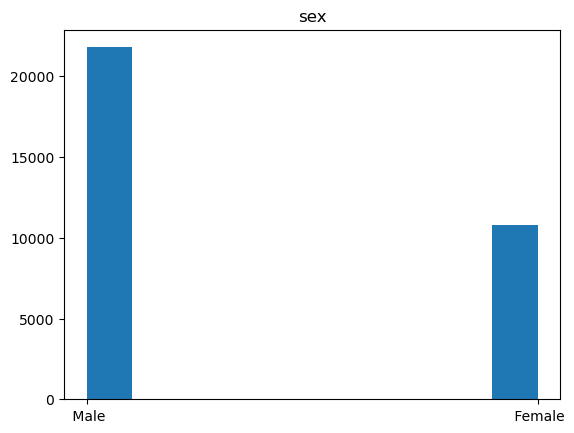

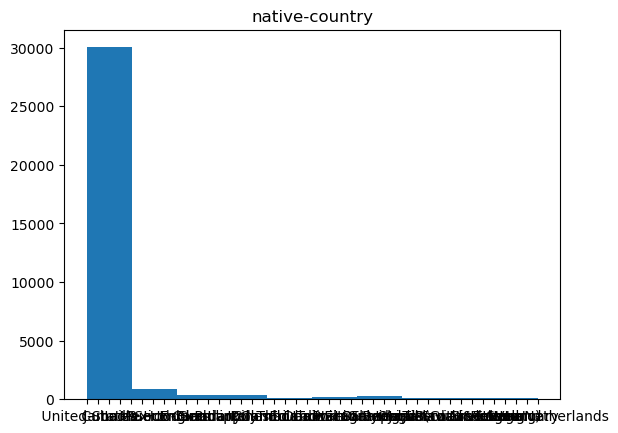

In [10]:
categorical_column=df.select_dtypes(include='object').columns
for i in categorical_column:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

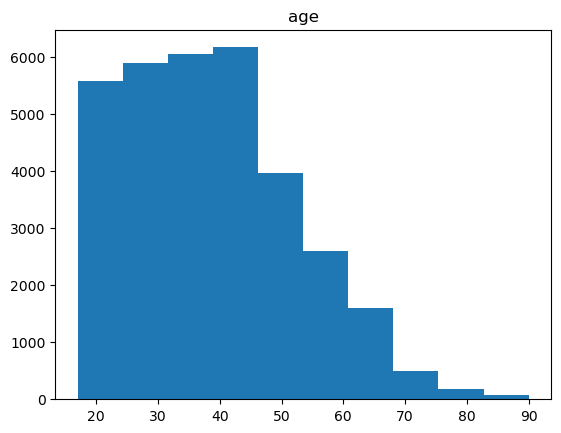

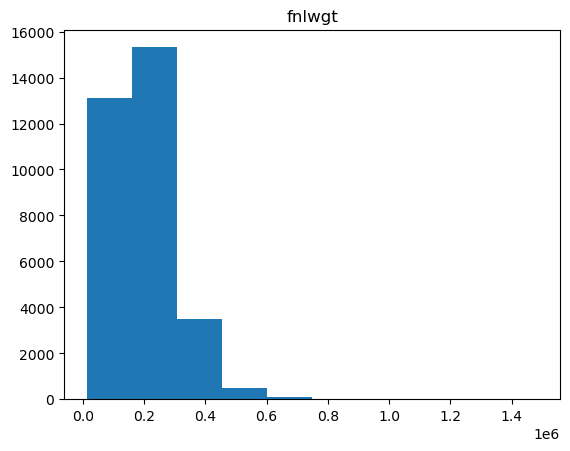

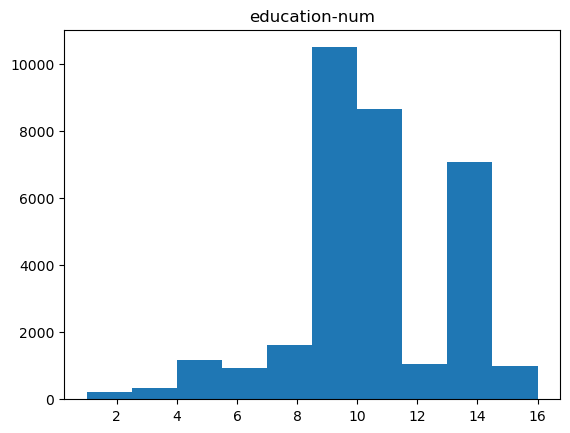

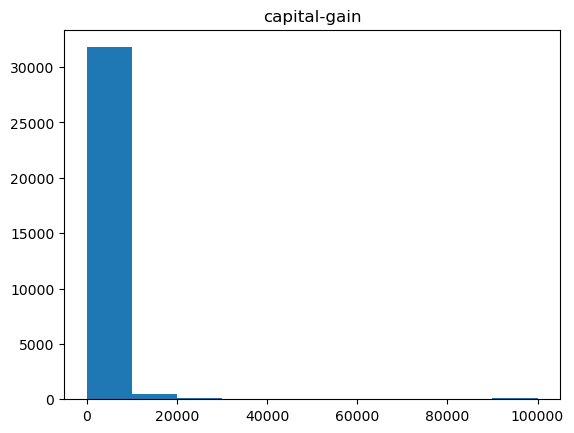

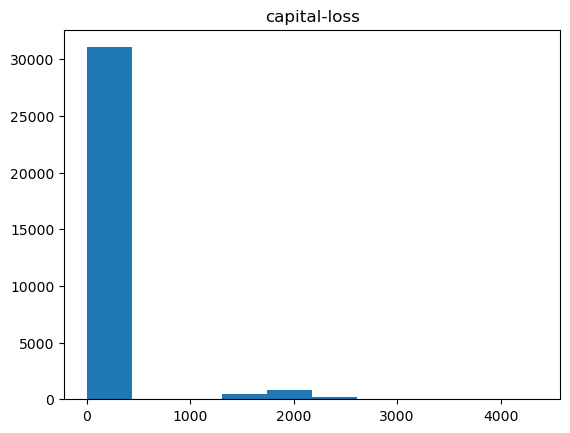

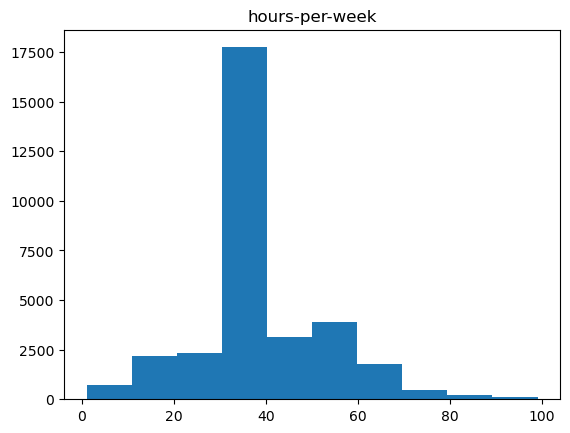

In [11]:
numerical_column=df.select_dtypes(exclude='object').columns
for i in numerical_column:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

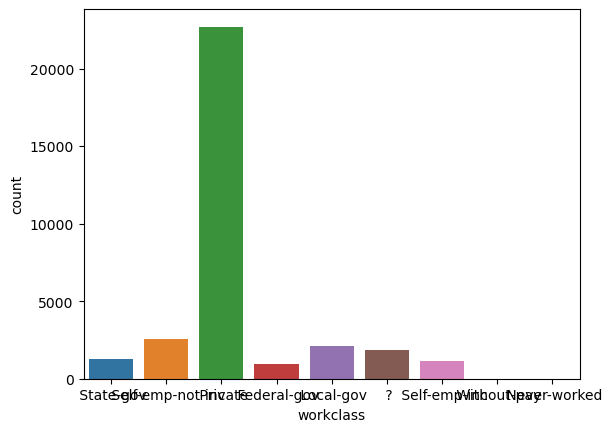

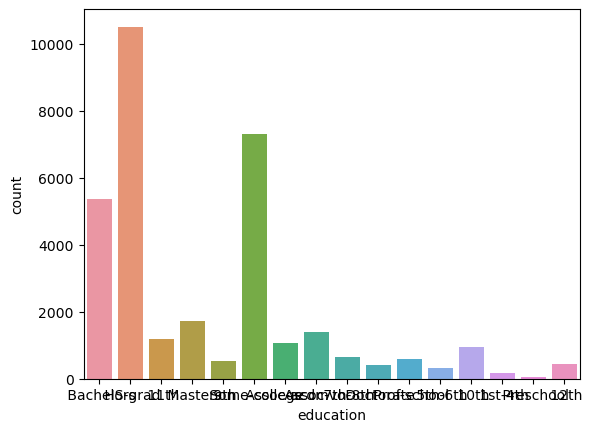

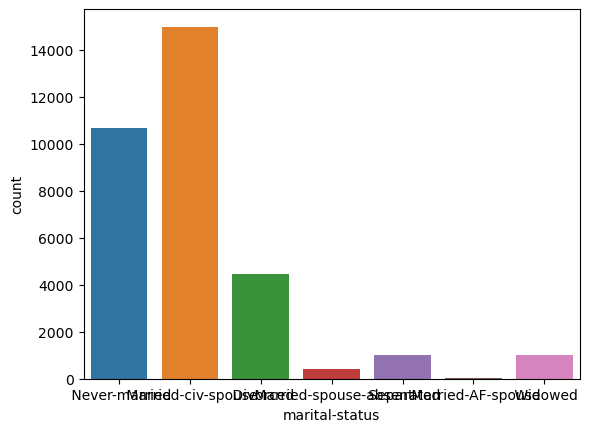

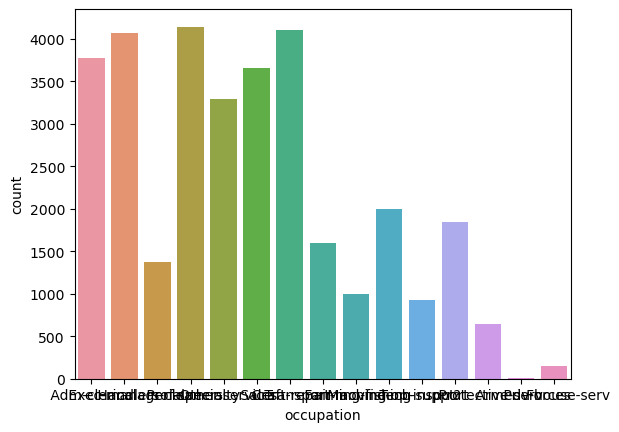

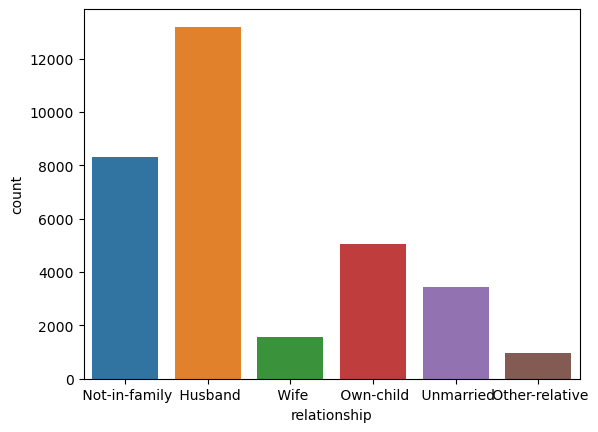

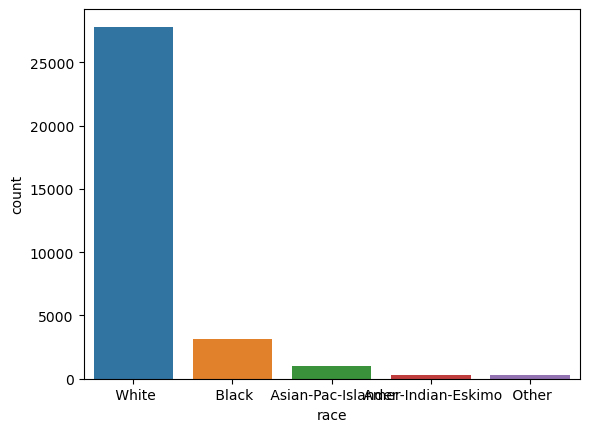

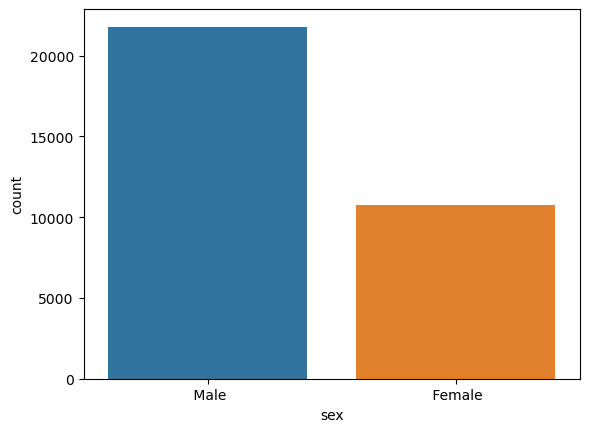

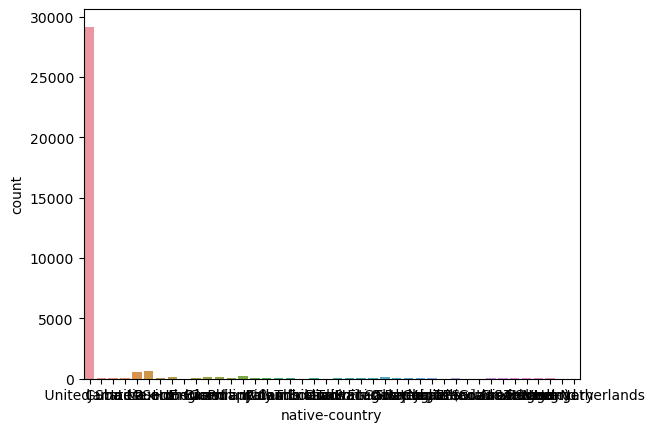

In [12]:
object_columns = df.select_dtypes('object').columns


for i in df[object_columns].columns:
    plt.figure()
    sns.countplot(x=i,data=df);

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<AxesSubplot:>

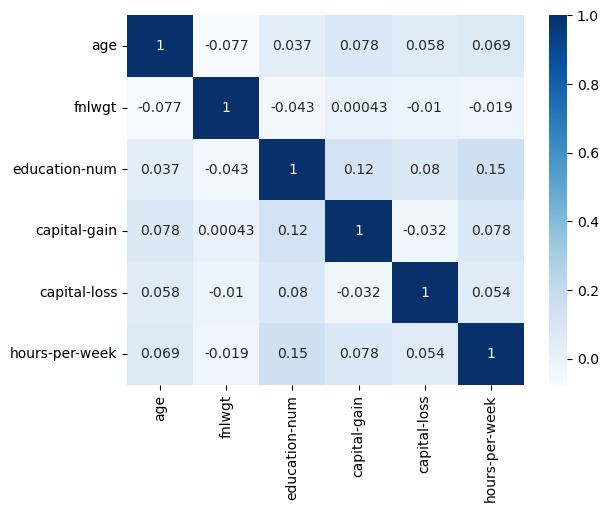

In [13]:
# 9. Draw Heatmap and find the correlation between the features.
correlation=df.corr()
display(correlation)
sns.heatmap(correlation,cmap="Blues" ,annot=True)

# Part A (Models Implementation) :

1. Split the dataset into 60% for training and 40% for testing.
2. Train and fit your model on the given dataset.
3. Apply the following Models:
Support Vector Machines, Decision Tree, and Random Forest.
4. Apply evaluation matrics on the above models and write which model performs better and why.

In [14]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn import metrics

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Define the categorical column(s) to be encoded
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Encode the categorical columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [16]:
df.head(40)
df.shape# 

(32561, 14)

In [17]:
# Split the dataset into 60% for training and 40% for testing.
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.4)

In [18]:
from sklearn.metrics import confusion_matrix
model_svc = SVC()
model_svc.fit(X_train,y_train)
pred_svc=model_svc.predict(X_test)
print(confusion_matrix(y_test,pred_svc))
metrics.accuracy_score(y_test,y_pred=pred_svc)


[[ 449 2700]
 [   4 9872]]


0.7923992322456814

In [19]:
model_ds = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0)
model_ds.fit(X_train,y_train) 
pred_ds=model_ds.predict(X_test)
print(confusion_matrix(y_test,pred_ds))
metrics.accuracy_score(y_test,y_pred=pred_ds)


[[1740 1409]
 [ 523 9353]]


0.8516698656429943

In [20]:
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)
pred_rf=model_rf.predict(X_test)
print(confusion_matrix(y_test,pred_rf))
metrics.accuracy_score(y_test,y_pred=pred_rf)



[[2036 1113]
 [ 733 9143]]


0.8582725527831094

##### Based on the results   the Random Forest model seems to be the best option among the three machine learning algorithms we used (SVM, Decision Tree, and Random Forest). The SVM model has a decent accuracy, but it's not as good as the other two models. Additionally, its confusion matrix shows a high number of false negatives, which can be a problem in certain scenarios.The Decision Tree model has a slightly better accuracy than SVM, but its confusion matrix shows a high number of false positives, which is also not desirable. On the other hand, the Random Forest model has the highest accuracy among the three models and its confusion matrix shows a relatively low number of false positives and false negatives. This means that it is better at correctly classifying both positive and negative instances.In summary, based on the  results, the Random Forest model is the best option as it has the highest accuracy and the lowest number of false positives and false negatives.